Exploring the $\chi^2$ distribution
===

Start with some model to generate random data.  <br> 
We'll use $0.2+\frac{sin(x)}{x+1}$ over the range $0\leq x<15$ <br>
Generate $N$ random numbers according to this distribution and make a histogram of the results using 30 bins. 

An easy way to generate random numbers according to an arbitrary distribution is to use rejection sampling (here's a great [decription  of the technique](https://matthewfeickert.github.io/Statistics-Notes/notebooks/simulation/Rejection-Sampling-MC.html) )

1) Make a histogram of your random distribution.  Verify that the the numbers you generated agree with the shape of the function.  Generate at least 10000 points and plot your data in a histogram with errorbars.  You can use numpy+matplotlib+etc, PyROOT, or a mix.  Think about how to appropriately normalize your function, then overlay it with the data.  The normalization depends on the number of bins, the bin range and the number of points thrown.  You may find it easier to first nromalize the area of your function to 1.0, thus turning it into a proper PDF.  

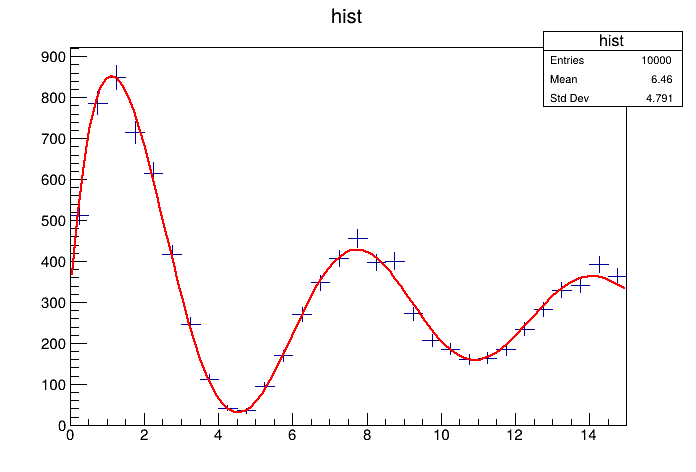

In [1]:
# your work goes here
import ROOT as r

N = 10000

f1 = r.TF1("F1", "[0]*0.2+[0]*sin(x)/(x+1)", 0,15)
hist = r.TH1D("hist", "hist", 30, 0, 15)

f1.SetParameter(0,1)

for i in range(N):
    hist.Fill(f1.GetRandom())

f1.SetParameter(0,1363.85)

tc = r.TCanvas()
hist.Draw("e")
f1.Draw("same")
tc.Draw()


2) Repeat the above experiment at least 1000 times.  For each experiment calculate the $\chi^2$ of your data with respect to your (properly normalized) model.  Plot (histogram) the $\chi^2$ distribution and compare it to the functional form of the $\chi^2(ndof=30)$ distribution.  You can find the form of the $\chi^2(ndof)$ PDF function in many places and implement it using the Gamma function or use a premade function, eg:
* [wikipedia](https://en.wikipedia.org/wiki/Chi-squared_distribution)
* [scipy.stats.chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)

In [2]:
# your work goes here
import numpy as np
chi2 = []

f1 = r.TF1("F1", "[0]*0.2+[0]*sin(x)/(x+1)", 0,15)

for i in range(1000):
    f1.SetParameter(0,1)
    data = []
    for j in range(10000):
        data.append(f1.GetRandom())
    f1.SetParameter(0,1363.85)

    vals, bins = np.histogram(data, bins=30)
    count = 0
    for i in range(len(bins)-1):
        count += ((vals[i]-f1.Eval((bins[i]+bins[i+1])/2))/np.sqrt(vals[i]))**2
    chi2.append(count)

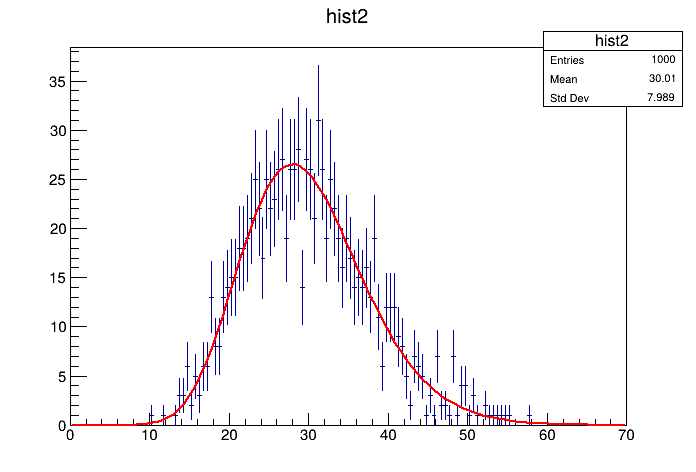

In [3]:
from scipy.special import gamma

#def chi_dof(x, p):
#    return 1/(2**(p[0]/2)*gamma(k[0]/2))*x[0]**(p[0]/2-1)*np.exp(-x[0]/2)

f2 = r.TF1("chiPDF", "500/(2^(30/2)*TMath::Gamma(30/2))*x^(30/2-1)*exp(-x/2)", 0,70)

hist2 = r.TH1D("hist2", "hist2", 140, 0, 70)

for i in chi2:
    hist2.Fill(i)

f2.SetParameters(0,30)

tc2 = r.TCanvas()
hist2.Draw("e")
f2.Draw("same")
tc2.Draw()


**Only required for Phys5630**

3) Modify your code above to perform the following study. <br>
Repeat (2) for nbins = $ndof = 30, 50, 75, 100$ and calculate the reduced $\chi^2$, eg $\chi^2/ndof$ for each experiment.  Plot the mean value of the reduced $\chi^2$ with errorbars versus $ndof$.  Make a table comparing your calculations to the expected results.

In [4]:
# your work goes here
import matplotlib.pyplot as plt
chi2 = []
chi_err = []

ndofs = [30,50,75,100]

for ndof in ndofs:
    chi = []

    f1 = r.TF1("F1", "[0]*0.2+[0]*sin(x)/(x+1)", 0,15)

    for i in range(1000):
        f1.SetParameter(0,1)
        data = []
        for j in range(10000):
            data.append(f1.GetRandom())
        f1.SetParameter(0,2727.7/(ndof/15))

        vals, bins = np.histogram(data, bins=ndof)
        count = 0
        for i in range(len(bins)-1):
            count += ((vals[i]-f1.Eval((bins[i]+bins[i+1])/2))/np.sqrt(vals[i]))**2
        chi.append(count/(ndof))
    chi2.append(np.mean(chi))
    chi_err.append(np.std(chi)/np.sqrt(len(chi)))


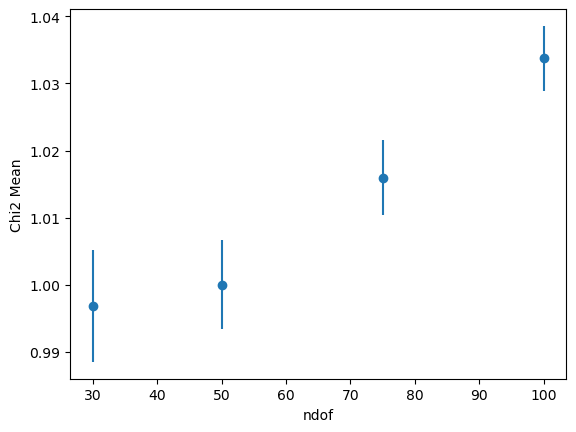

ndof |  Mean Chi^2  |   Expected
------------------------------
 30  | 0.997+/-0.008 |  1
 50  | 1.000+/-0.007 |  1
 75  | 1.016+/-0.006 |  1
 100  | 1.034+/-0.005 |  1


In [5]:
fig = plt.figure()
plt.errorbar(ndofs, chi2, yerr=chi_err, fmt="o")
plt.xlabel("ndof")
plt.ylabel("Chi2 Mean")
plt.show()


print("ndof |  Mean Chi^2  |   Expected")
print("-"*30)
for i in range(4):
    print(f" {ndofs[i]}  | {chi2[i]:.03f}+/-{chi_err[i]:.03f} |  1")